In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
mydata = pd.read_csv("../dataset/ABC Company.xlsx - Sheet1.csv")
mydata.head()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,06-Feb,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,06-Jun,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,06-May,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,06-May,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,06-Oct,231,NaN,5000000.0


* Corrected the data in the Height column by replacing invalid values with random numbers between 150 and 180 cm.

In [61]:
height=mydata['Height']
import numpy as np
n=len(mydata)
import random
mydata['Height'] = np.random.randint(150, 181, size=n)
mydata.head()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,170,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,158,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,156,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,171,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,161,231,NaN,5000000.0


In [62]:
team_counts=mydata['Team'].value_counts()
team_counts

Team
New Orleans Pelicans      19
Memphis Grizzlies         18
Utah Jazz                 16
Milwaukee Bucks           16
New York Knicks           16
Boston Celtics            15
Los Angeles Clippers      15
Los Angeles Lakers        15
Phoenix Suns              15
Sacramento Kings          15
Brooklyn Nets             15
Philadelphia 76ers        15
Toronto Raptors           15
Golden State Warriors     15
Indiana Pacers            15
Detroit Pistons           15
Cleveland Cavaliers       15
Chicago Bulls             15
Houston Rockets           15
San Antonio Spurs         15
Atlanta Hawks             15
Dallas Mavericks          15
Charlotte Hornets         15
Miami Heat                15
Denver Nuggets            15
Washington Wizards        15
Portland Trail Blazers    15
Oklahoma City Thunder     15
Orlando Magic             14
Minnesota Timberwolves    14
Name: count, dtype: int64

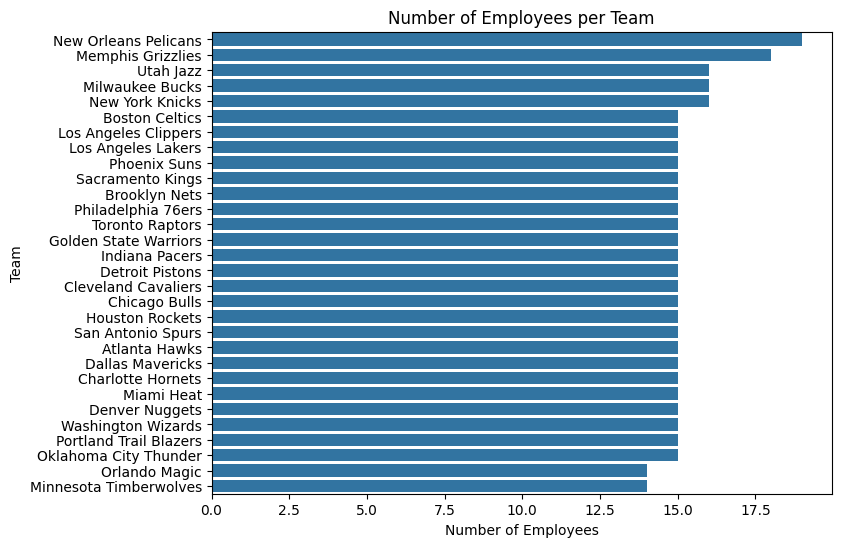

In [106]:
plt.figure(figsize=(8,6))
sns.countplot(y='Team', data=mydata, order=mydata['Team'].value_counts().index)
plt.title("Number of Employees per Team")
plt.xlabel("Number of Employees")
plt.ylabel("Team")
plt.show()

* Determined the counts in each team. 
* Most of the team contains 15-14 members. 
* New orleans Pelicans team contain high count, it have 19 team members.

In [64]:
team_percent=round((team_counts / n)*100,2)
team_percent

Team
New Orleans Pelicans      4.15
Memphis Grizzlies         3.93
Utah Jazz                 3.49
Milwaukee Bucks           3.49
New York Knicks           3.49
Boston Celtics            3.28
Los Angeles Clippers      3.28
Los Angeles Lakers        3.28
Phoenix Suns              3.28
Sacramento Kings          3.28
Brooklyn Nets             3.28
Philadelphia 76ers        3.28
Toronto Raptors           3.28
Golden State Warriors     3.28
Indiana Pacers            3.28
Detroit Pistons           3.28
Cleveland Cavaliers       3.28
Chicago Bulls             3.28
Houston Rockets           3.28
San Antonio Spurs         3.28
Atlanta Hawks             3.28
Dallas Mavericks          3.28
Charlotte Hornets         3.28
Miami Heat                3.28
Denver Nuggets            3.28
Washington Wizards        3.28
Portland Trail Blazers    3.28
Oklahoma City Thunder     3.28
Orlando Magic             3.06
Minnesota Timberwolves    3.06
Name: count, dtype: float64

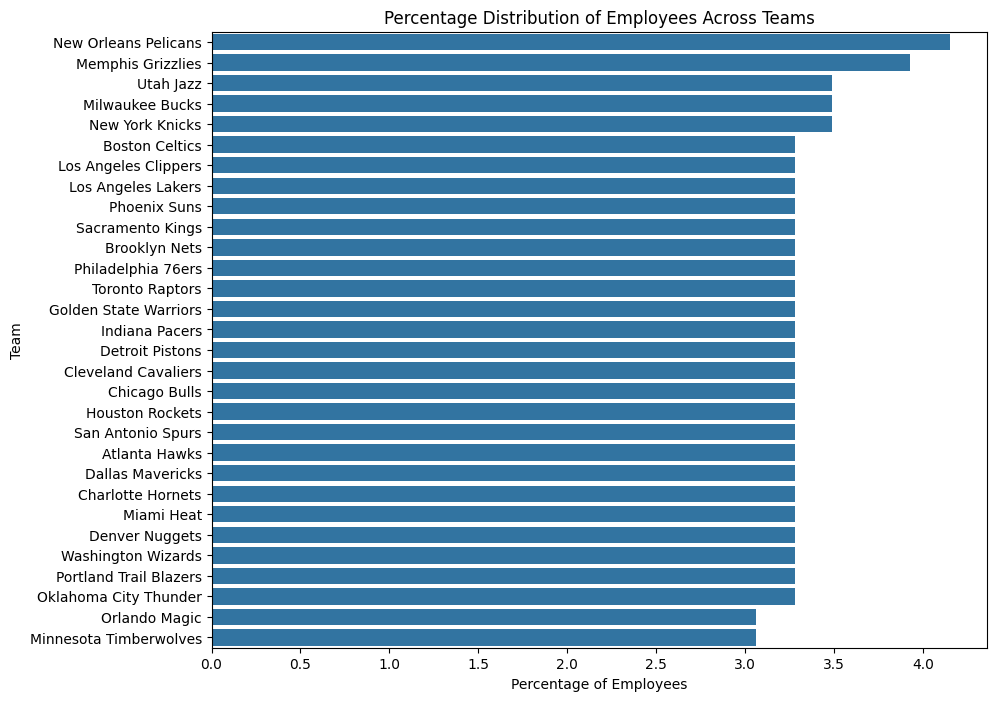

In [ ]:
plt.figure(figsize=(10,8))
sns.barplot(x=team_percent.values, y=team_percent.index,orient='h')
plt.title("Percentage Distribution of Employees Across Teams")
plt.xlabel("Percentage of Employees")
plt.ylabel("Team")
plt.show()



* From the above plot we inderstand that New Orleans Pelicans have the highest percent of employees. 
* Every team have minimum of 14 members. 
* Oriando Magic and Minnesota Timberwolves have low percent of employees.

In [65]:
position_counts=mydata['Position'].value_counts()
position_counts

Position
SG    102
PF    100
PG     92
SF     85
C      79
Name: count, dtype: int64

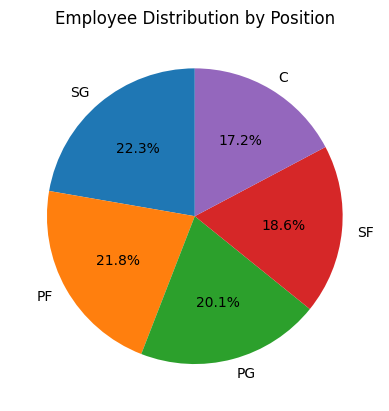

In [96]:
position_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title("Employee Distribution by Position")
plt.ylabel('')
plt.show()

* From the above graph we understand the employee distribution by position. 
* 102 employees are in SG position. 
* C is the lowest with 17.2 percent. 

In [66]:
age_group_counts = mydata['Age'].value_counts()
age_group_counts
bins = [0, 29, 39, 49, 100]  
labels = ['20-29', '30-39', '40-49', '50+']

# Creating a new col
mydata['Age_Group'] = pd.cut(mydata['Age'], bins=bins, labels=labels, right=True)


mydata[ 'Age_Group'].head()
mydata["Age_Group"].value_counts()

Age_Group
20-29    336
30-39    119
40-49      3
50+        0
Name: count, dtype: int64

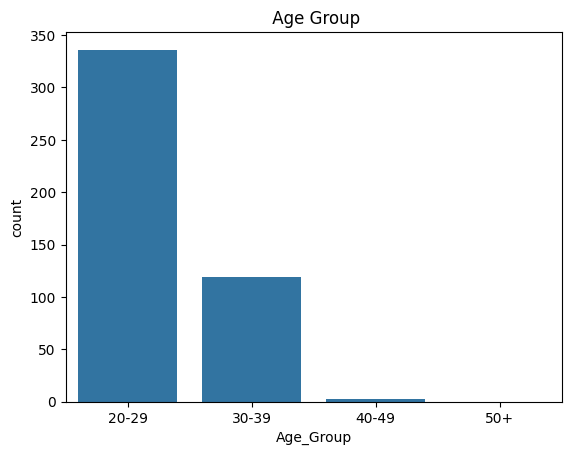

In [67]:
sns.countplot(x='Age_Group', data=mydata)
plt.title(' Age Group')
plt.show()

* Here we created new column Age_Group to determine the predominant age group among employees.
* From the above graph we understand that the predominant age group is 20-29, indicating a relatively young workforce.

In [68]:
team_salary=mydata.groupby('Team')['Salary'].sum()
high_salary_team=team_salary.idxmax()
print("Team having the highest salary",high_salary_team)
position_salary=mydata.groupby('Position')['Salary'].sum()
position_salary
high_position_salary=position_salary.idxmax()
print("Position having the highest salary",high_position_salary)

Team having the highest salary Cleveland Cavaliers
Position having the highest salary C


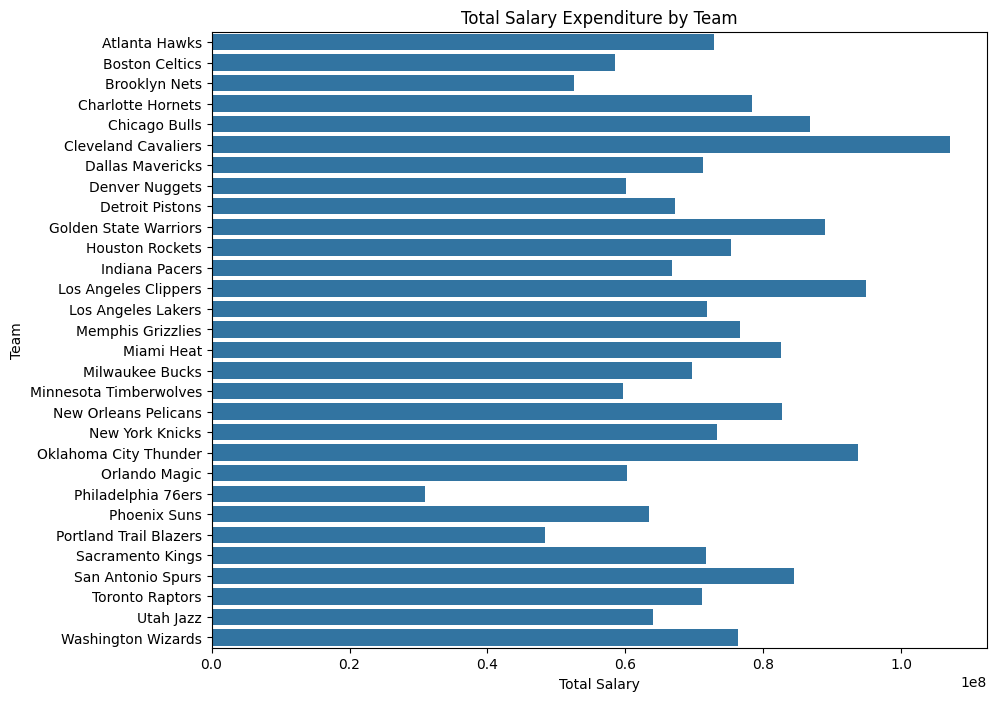

In [103]:
plt.figure(figsize=(10,8))
sns.barplot(
    x=team_salary.values,
    y=team_salary.index,
    orient='h'
)
plt.title("Total Salary Expenditure by Team")
plt.xlabel("Total Salary")
plt.ylabel("Team")
plt.show()

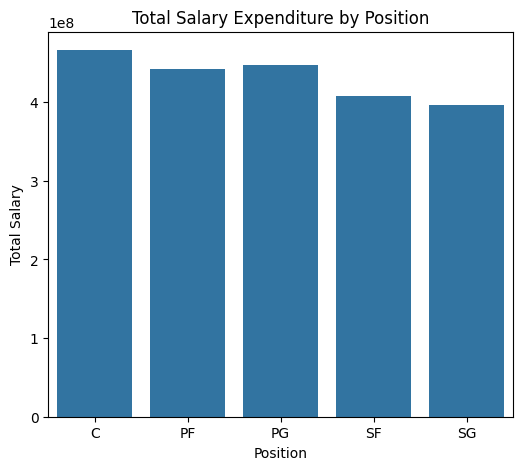

In [104]:
plt.figure(figsize=(6,5))
sns.barplot(
    x=position_salary.index,
    y=position_salary.values
)
plt.title("Total Salary Expenditure by Position")
plt.xlabel("Position")
plt.ylabel("Total Salary")
plt.show()

* Here we need to find the team having the highest salary and the position having the highest salary.
* From the above two plot we understand that the Team having the highest salary "Cleveland Cavaliers" and Position having the highest salary is "C".
* Lowest salary : Team = Philadelphia 76ers, Position: SG

In [70]:
correlation = mydata['Age'].corr(mydata['Salary'])

print(f"Correlation between Age and Salary: {correlation:.2f}")
correlation

Correlation between Age and Salary: 0.21


np.float64(0.2140094122657097)

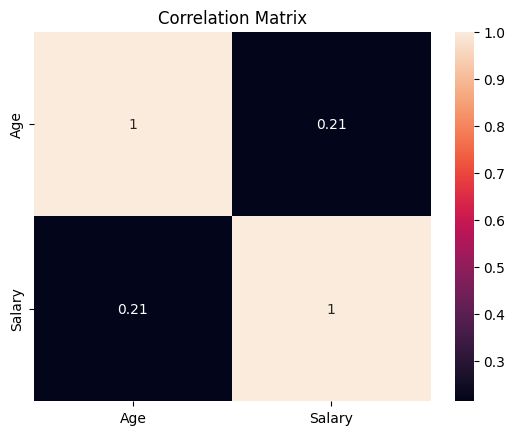

In [71]:
sns.heatmap(mydata[['Age', 'Salary']].corr(), annot=True)
plt.title('Correlation Matrix')
plt.show()

* Here we understand the correlation between age and salary. 
* The correlation of age and salary is 0.21
* Indicating a slight positive correlation, older employees tend to earn slightly more, but salary is influenced more by position and performance.

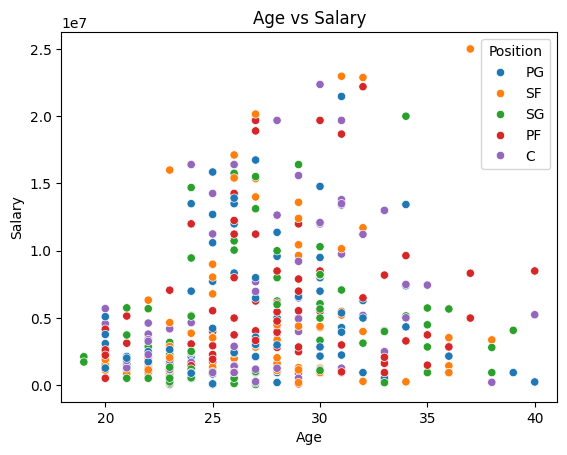

In [115]:

sns.scatterplot(x='Age', y='Salary', data=mydata, hue='Position')
plt.title('Age vs Salary')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.show()

* From the above graph between age and salary we understand that highest salary is in between 23- 38.
* we can see different position having different salary . 


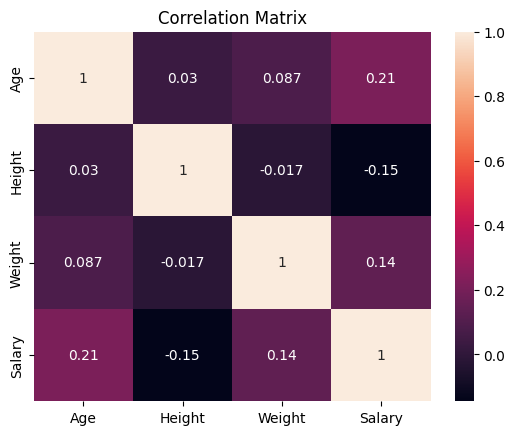

In [113]:
#correlation within the dataset.
sns.heatmap(mydata[['Age','Height','Weight','Salary']].corr(), annot=True)
plt.title('Correlation Matrix') 
plt.show()
